# **PowerPulse**: Household Energy Usage Forecast.

# 1. Data Understanding and Exploration:

**Load and explore the dataset to understand its structure, variables, and quality**

In [2]:
import pandas as pd 

Read the CSV file with some Custom Parameters:-

In [3]:
Data_FilePath="household_power_consumption.txt"

dfhhpc = pd.read_csv(Data_FilePath, sep=';', low_memory=False,na_values=["?"], parse_dates={"datetime": ["Date", "Time"]}, infer_datetime_format=True)

C:\Users\Lathiga Magasri\AppData\Local\Temp\ipykernel_5884\3111440592.py:3: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  dfhhpc = pd.read_csv(Data_FilePath, sep=';', low_memory=False,na_values=["?"], parse_dates={"datetime": ["Date", "Time"]}, infer_datetime_format=True)
C:\Users\Lathiga Magasri\AppData\Local\Temp\ipykernel_5884\3111440592.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dfhhpc = pd.read_csv(Data_FilePath, sep=';', low_memory=False,na_values=["?"], parse_dates={"datetime": ["Date", "Time"]}, infer_datetime_format=True)
C:\Users\Lathiga Magasri\AppData\Local\Temp\ipykernel_5884\3111440592.py:3: UserWarning: Parsing dates in %d/%m/%Y

In [4]:
dfhhpc.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


**Perform exploratory data analysis (EDA) to identify patterns, correlations, and outliers**

In [5]:
dfhhpc.info()
dfhhpc.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   datetime               datetime64[ns]
 1   Global_active_power    float64       
 2   Global_reactive_power  float64       
 3   Voltage                float64       
 4   Global_intensity       float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2075259,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,2008-12-06 07:12:59.999994112,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
min,2006-12-16 17:24:00,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2007-12-12 00:18:30,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008-12-06 07:13:00,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,2009-12-01 14:07:30,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,2010-11-26 21:02:00,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01
std,NaN,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00


**Zero Values:**

Columns like Sub_metering_1 and Sub_metering_2 have a significant number of zero values (25%, and 50% are 0.0), which might represent periods of no activity.

**Outliers:**

Columns like Sub_metering_1 and Sub_metering_2 have very high maximum values compared to their 75th percentiles, suggesting the presence of outliers.

In [6]:
dfhhpc.shape

(2075259, 8)

**Correlation Heatmap**

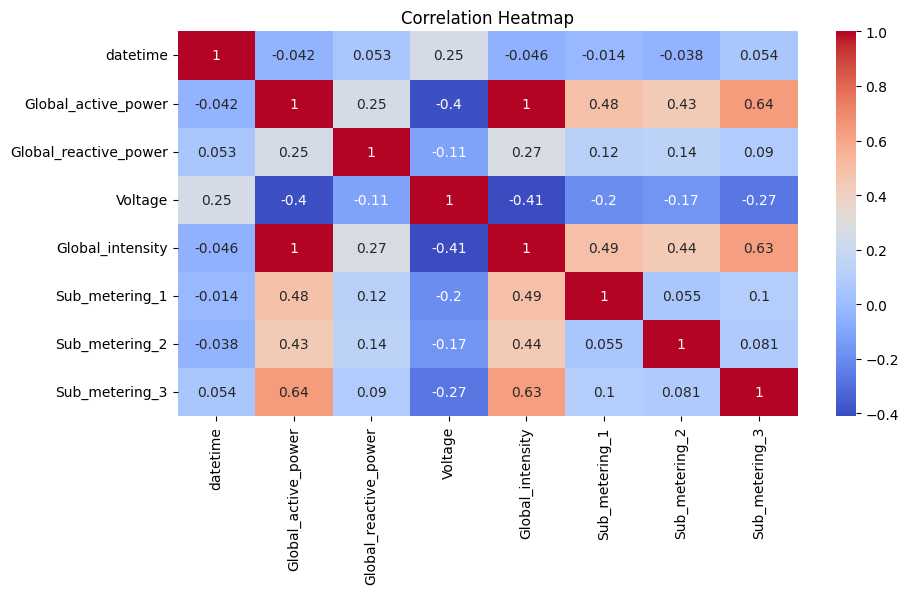

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize=(10, 5))
sns.heatmap(dfhhpc.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Outlier using Box Plot**

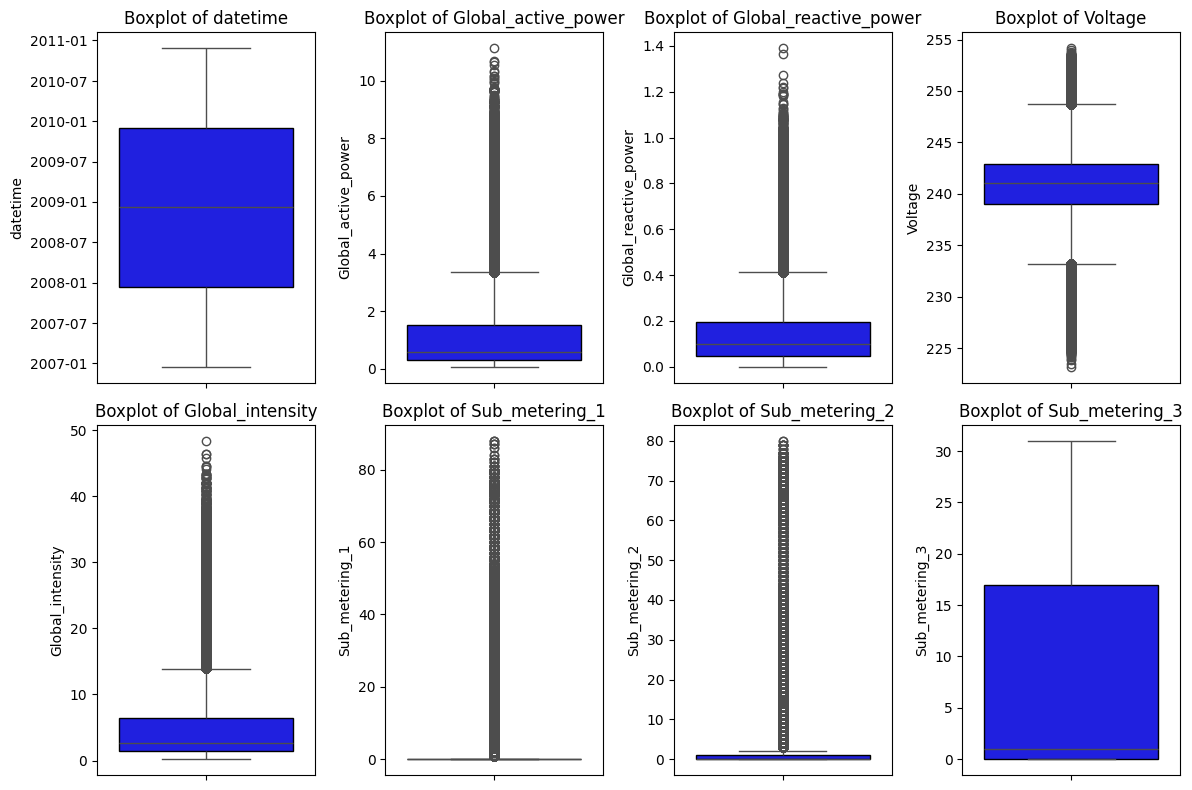

In [8]:
plt.figure(figsize=(12,8)) 
for i, column in enumerate(dfhhpc, 1):
    plt.subplot(2, 4, i) 
    sns.boxplot(dfhhpc[column],color = 'blue',boxprops=dict(edgecolor='k'))
    plt.title(f'Boxplot of {column}')
plt.tight_layout() 
plt.show() 

Boxplots show the outliers of dataset.

**Global_active_power & Global_intensity:**

Boxplots indicate some potential outliers.

**Global_reactive_power:**

Boxplot suggests a right-skewed distribution.

**Voltage:**

Boxplot shows some extreme values at both ends.

**Sub_metering variables:**

Sub_metering_1 and Sub_metering_2 suggest most values are concentrated around zero. Sub_metering_3 has more spread-out values. Boxplots highlight possible outliers.

# 2. Data Preprocessing:

**Handle missing or inconsistent data points**

<Axes: >

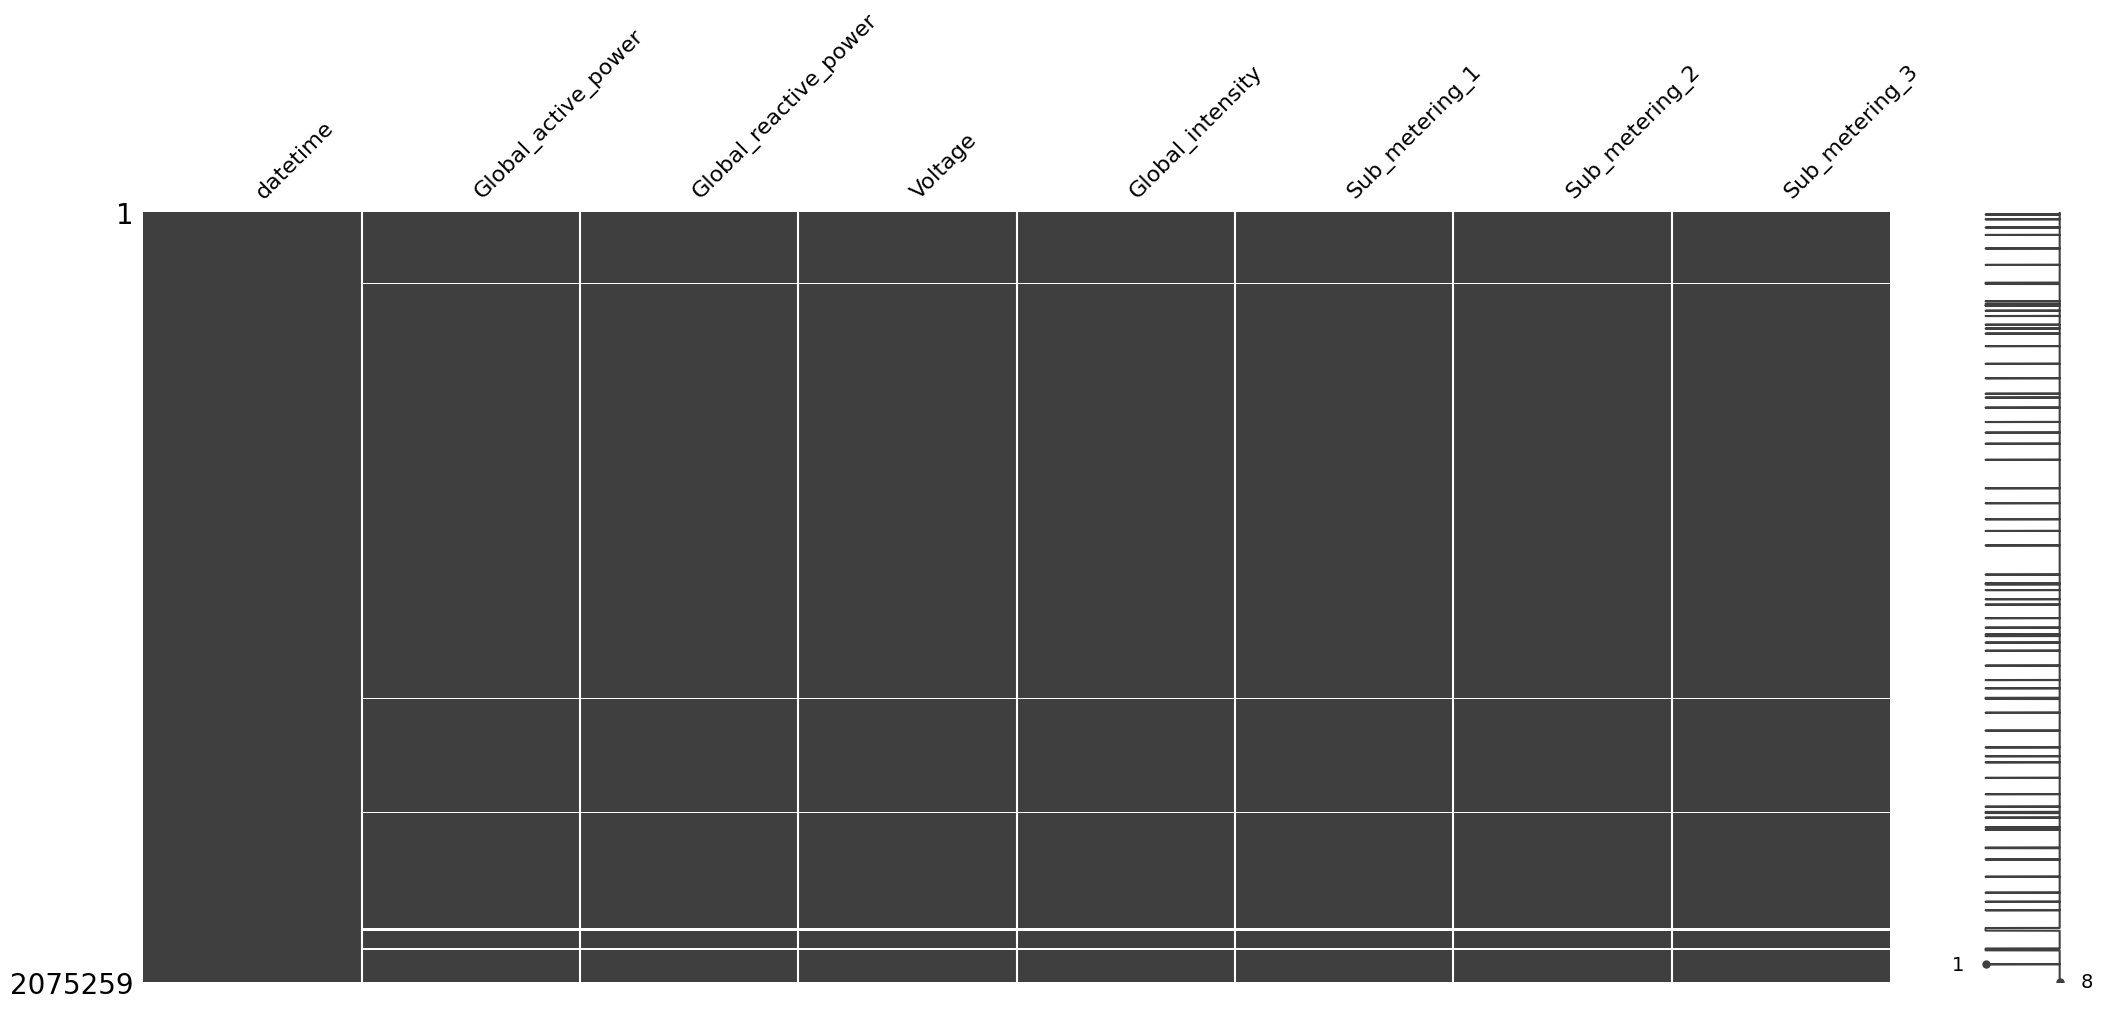

In [9]:
import missingno as msno 
msno.matrix(dfhhpc)

Except datetime other columns having missing values in the above diagram.

In [10]:
dfhhpc.isnull().sum()

datetime                     0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

Since Data have 25,979 missing rows, it was time series data,so best method was

**Forward Fill (Best for Time-Series)**

In [11]:
dfhhpc.fillna(method='ffill', inplace=True)

C:\Users\Lathiga Magasri\AppData\Local\Temp\ipykernel_5884\1638334063.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dfhhpc.fillna(method='ffill', inplace=True)


In [12]:
dfhhpc.isnull().sum()

datetime                 0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

**Parse date and time into separate features**

In [13]:
dfhhpc["year"] = dfhhpc["datetime"].dt.year
dfhhpc["month"] = dfhhpc["datetime"].dt.month
dfhhpc["day"] = dfhhpc["datetime"].dt.day
dfhhpc["hour"] = dfhhpc["datetime"].dt.hour
dfhhpc["weekday"] = dfhhpc["datetime"].dt.weekday

Create additional features such as daily averages, peak hours, or rolling averages

- daily_avg_power     → Calculates daily average power consumption. <br>
- peak_hour           → Marks peak energy hours (5 PM to 10 PM) as 1, otherwise 0. <br>
- rolling_avg_power   → Computes a moving average over a 60-minute window.

In [14]:
dfhhpc["daily_avg_power"] = dfhhpc.groupby(dfhhpc["datetime"].dt.date)["Global_active_power"].transform("mean")
dfhhpc["peak_hour"] = dfhhpc["hour"].apply(lambda x: 1 if 17 <= x <= 22 else 0)
dfhhpc["rolling_avg_power"] = dfhhpc["Global_active_power"].rolling(window=60, min_periods=1).mean()

# 3. Feature Engineering:

**Identify relevant features for predicting global active power consumption**

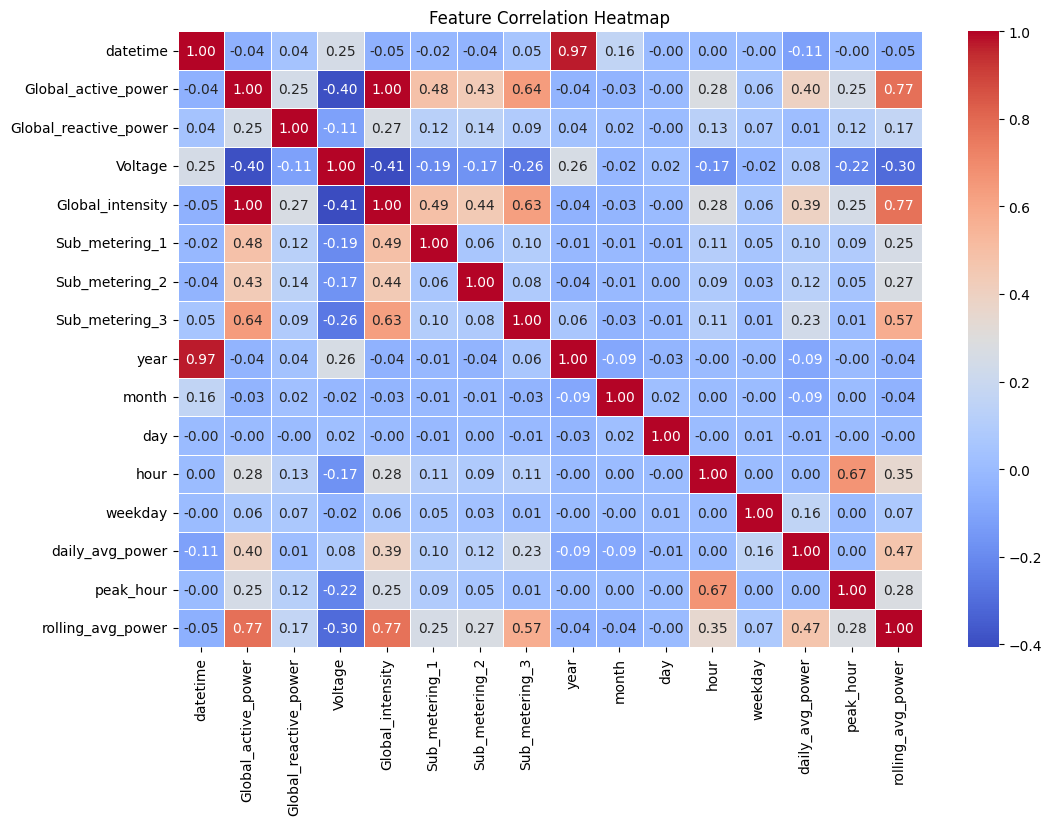

In [15]:
plt.figure(figsize=(12, 8))
corr_matrix = dfhhpc.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

**Strong Correlation with Global Active Power:**

Global Intensity (1.00): This makes sense as power consumption is directly related to current. <br>
Sub_metering_1 (0.48), Sub_metering_2 (0.43) & Sub_metering_3 (0.64): Indicates that all the sub-metered area contributes significantly to overall power usage. <br>
Rolling Average Power (0.77) & Daily Average Power (0.40): These engineered features show some relationship with Global Active Power.

**Negative Correlation:**

Voltage (-0.40): A notable inverse relationship, indicating that higher voltages might be associated with lower power consumption.


In [16]:
dfTrain=dfhhpc
dfTrain.drop(columns=["datetime"], inplace=True)

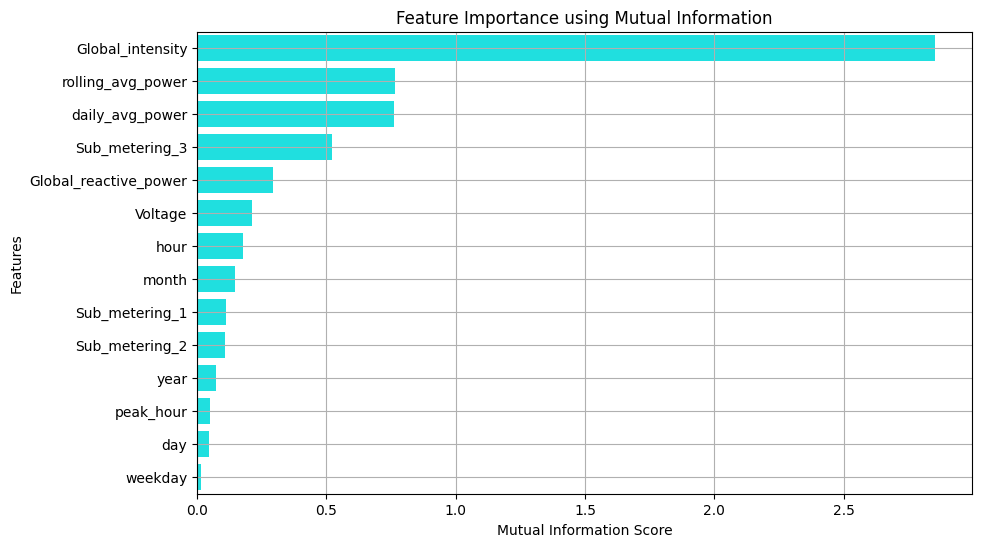

In [17]:
from sklearn.feature_selection import mutual_info_regression

x = dfTrain.drop(columns=["Global_active_power"])
y = dfTrain["Global_active_power"]
mi_scores = mutual_info_regression(x,y)
mi_scores = pd.Series(mi_scores, index=x.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=mi_scores, y=mi_scores.index,color = 'cyan')
plt.title("Feature Importance using Mutual Information")
plt.xlabel("Mutual Information Score")
plt.ylabel("Features")
plt.grid()
plt.show()

The Global_intensity feature has the highest mutual information score, indicating a strong relationship with Global_active_power. This suggests that current intensity is a major predictor of power consumption. Daily and Rolling Averages are Significant

rolling_avg_power and daily_avg_power contribute significantly, meaning that past consumption patterns influence future power usage.

Sub_metering_3, Sub_metering_1, Sub_metering_2, and Global_reactive_power show some relevance but are not the top predictors.

Features like hour, month, and weekday contribute, though with lower scores. This suggests that power usage varies with time but is not the strongest determinant.

Peak Hour Effects are Minimal

In [18]:
x = dfTrain[['Global_reactive_power','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3','Voltage']]
y = dfTrain["Global_active_power"]

Targe value set in y : Global_active_power<br>
Features selected as x : Global_reactive_power,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3 & Voltage

# 4. Model Selection and Training:

**Split the dataset into training and testing sets**

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=30)

Splits the dataset into training (70%) and testing (30%) sets. Helps train the model on one part of the data and test it on unseen data.

### Machine Learning models

In [20]:
from sklearn.linear_model import LinearRegression,Ridge 
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor 
from sklearn.tree import DecisionTreeRegressor

models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "DecisionTreeRegressor": DecisionTreeRegressor(random_state=30),
    "RandomForestRegressor": RandomForestRegressor(random_state=30),
    "GradientBoostingRegressor": GradientBoostingRegressor(random_state=30)
    }

### Training models

In [21]:
trained_models = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    trained_models[name] = model

### Evaluate models

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

evaluate_models={}
for name, model in models.items():
    y_pred = model.predict(x_test)
    evaluate_models[name] = {
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "MAE": mean_absolute_error(y_test, y_pred),
        "R-squared": r2_score(y_test, y_pred)
        }

print("Evaluate models:", evaluate_models)

Evaluate models: {'LinearRegression': {'RMSE': np.float64(0.0401183086352153), 'MAE': 0.025705529703033855, 'R-squared': 0.9985443961023203}, 'Ridge': {'RMSE': np.float64(0.04011830939214009), 'MAE': 0.02570553721361066, 'R-squared': 0.9985443960473935}, 'DecisionTreeRegressor': {'RMSE': np.float64(0.042277299300474046), 'MAE': 0.022411390676021443, 'R-squared': 0.9983835121204118}, 'RandomForestRegressor': {'RMSE': np.float64(0.032386686083585504), 'MAE': 0.018382551087423947, 'R-squared': 0.9990513827819116}, 'GradientBoostingRegressor': {'RMSE': np.float64(0.03399154272921477), 'MAE': 0.021343977984009537, 'R-squared': 0.9989550398442917}}


In [23]:
print("Evaluate models:")
for model_name, metrics in evaluate_models.items():
    print(f"\nModel: {model_name}")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")

Evaluate models:

Model: LinearRegression
  RMSE: 0.0401
  MAE: 0.0257
  R-squared: 0.9985

Model: Ridge
  RMSE: 0.0401
  MAE: 0.0257
  R-squared: 0.9985

Model: DecisionTreeRegressor
  RMSE: 0.0423
  MAE: 0.0224
  R-squared: 0.9984

Model: RandomForestRegressor
  RMSE: 0.0324
  MAE: 0.0184
  R-squared: 0.9991

Model: GradientBoostingRegressor
  RMSE: 0.0340
  MAE: 0.0213
  R-squared: 0.9990


**Perform hyperparameter tuning to optimize model performance**

In [26]:
from sklearn.model_selection import RandomizedSearchCV
param_space= {
    "RandomForestRegressor": {'n_estimators': [50, 100], 'max_depth': [None, 10], 'min_samples_split': [2, 5]},
    "GradientBoostingRegressor": {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}
    }

### Hyperparameter tuning Trained models

In [27]:
tuned_models = {}
for name, model in trained_models.items():
    if name in param_space:
        search = RandomizedSearchCV(model, param_space[name], cv=2, scoring='neg_mean_squared_error', n_jobs=-1, n_iter=3)
        search.fit(x_train, y_train)
        tuned_models[name] = search.best_estimator_
    else:
        tuned_models[name] = model

# 5. Model Evaluation:

### Evaluate tuned models using appropriate metrics

In [28]:
evaluate_tuned_models={}
for name, model in tuned_models.items():
    y_pred = model.predict(x_test)
    evaluate_tuned_models[name] = {
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "MAE": mean_absolute_error(y_test, y_pred),
        "R-squared": r2_score(y_test, y_pred)
        }

print("Evaluate tuned models:", evaluate_tuned_models)

Evaluate tuned models: {'LinearRegression': {'RMSE': np.float64(0.0401183086352153), 'MAE': 0.025705529703033855, 'R-squared': 0.9985443961023203}, 'Ridge': {'RMSE': np.float64(0.04011830939214009), 'MAE': 0.02570553721361066, 'R-squared': 0.9985443960473935}, 'DecisionTreeRegressor': {'RMSE': np.float64(0.042277299300474046), 'MAE': 0.022411390676021443, 'R-squared': 0.9983835121204118}, 'RandomForestRegressor': {'RMSE': np.float64(0.03439770032005812), 'MAE': 0.020379826036817983, 'R-squared': 0.9989299186460461}, 'GradientBoostingRegressor': {'RMSE': np.float64(0.033786406649352126), 'MAE': 0.02120709913321136, 'R-squared': 0.9989676142786071}}


In [29]:
print("Evaluate tuned models:")
for model_name, metrics in evaluate_tuned_models.items():
    print(f"\nModel: {model_name}")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")

Evaluate tuned models:

Model: LinearRegression
  RMSE: 0.0401
  MAE: 0.0257
  R-squared: 0.9985

Model: Ridge
  RMSE: 0.0401
  MAE: 0.0257
  R-squared: 0.9985

Model: DecisionTreeRegressor
  RMSE: 0.0423
  MAE: 0.0224
  R-squared: 0.9984

Model: RandomForestRegressor
  RMSE: 0.0344
  MAE: 0.0204
  R-squared: 0.9989

Model: GradientBoostingRegressor
  RMSE: 0.0338
  MAE: 0.0212
  R-squared: 0.9990


### Compare model performance and select the best-performing model

In [30]:
best_model = max(evaluate_tuned_models, key=lambda k: evaluate_tuned_models[k]["R-squared"])
best_model_metrics = evaluate_tuned_models[best_model]

print("\nBest Model:")
print(f"Model: {best_model}")
for metric, value in best_model_metrics.items():
    print(f"  {metric}: {value:.4f}")


Best Model:
Model: GradientBoostingRegressor
  RMSE: 0.0338
  MAE: 0.0212
  R-squared: 0.9990


# Visualization of predictive performance

In [31]:
model_predictions = {name: model.predict(x_test) for name, model in tuned_models.items()}

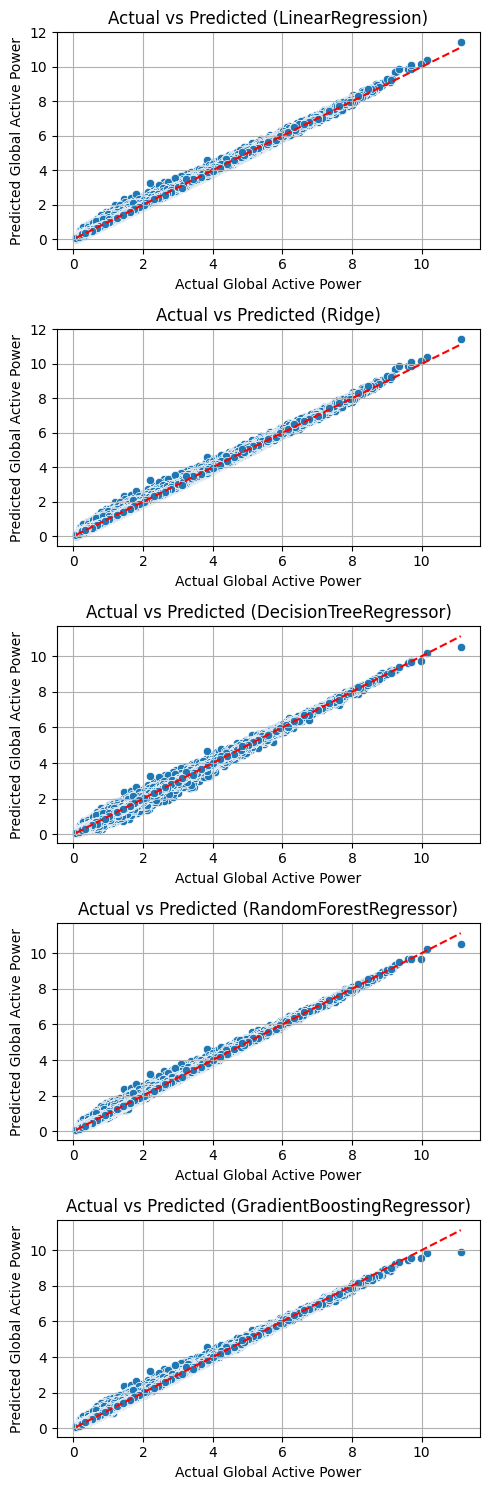

In [53]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(5, 15))
axes = axes.flatten()

for (model_name, y_pred), ax in zip(model_predictions.items(), axes):
    sns.scatterplot(x=y_test, y=y_pred, ax=ax)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--',color='red')
    ax.set_title(f"Actual vs Predicted ({model_name})")
    ax.set_xlabel("Actual Global Active Power")
    ax.set_ylabel("Predicted Global Active Power")
    ax.grid()
plt.tight_layout()
plt.show()

**Insights:**

**Gradient Boosting Regressor** is Very close alignment with the actual values, similar to Random Forest. Small deviations at extreme values, but overall strong predictive performance. So as per evaluation metrics Gradient Boosting Regressor is the best model for the given data.

# Visualization of energy trends

### Visualizing Yearly Trends

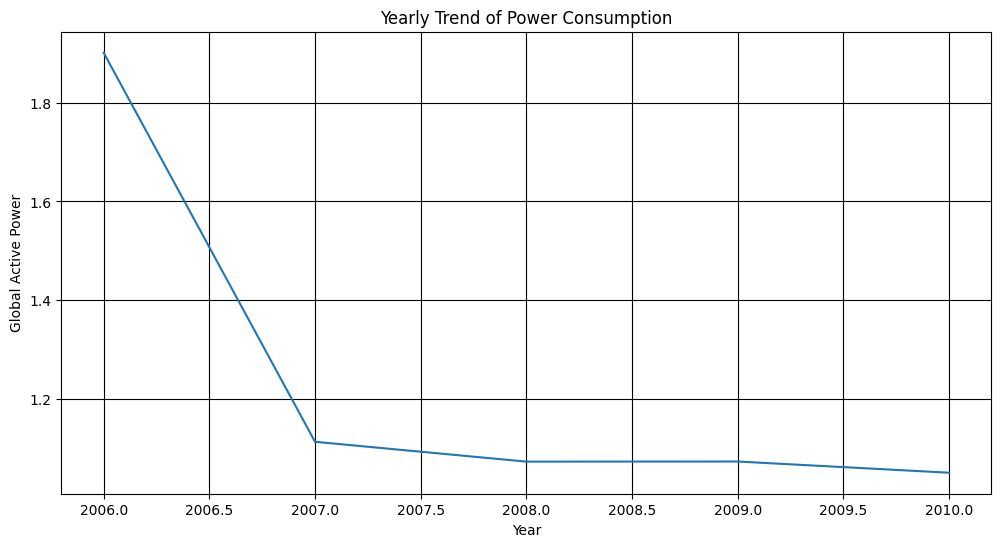

In [59]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=dfhhpc, x='year', y='Global_active_power', estimator='mean', errorbar=None)
plt.title("Yearly Trend of Power Consumption")
plt.xlabel("Year")
plt.ylabel("Global Active Power")
plt.grid(True, color='k')
plt.show()

**Insights:**

Plots a line graph showing the average energy consumption per year. Helps identify long-term trends in power usage.

Graph shows a consistent decrease in power consumption from 2006 to 2010 and decline could be due to factors like energy efficiency improvements, changes in household behaviors, or external economic influences

### Visualizing Monthly Trends

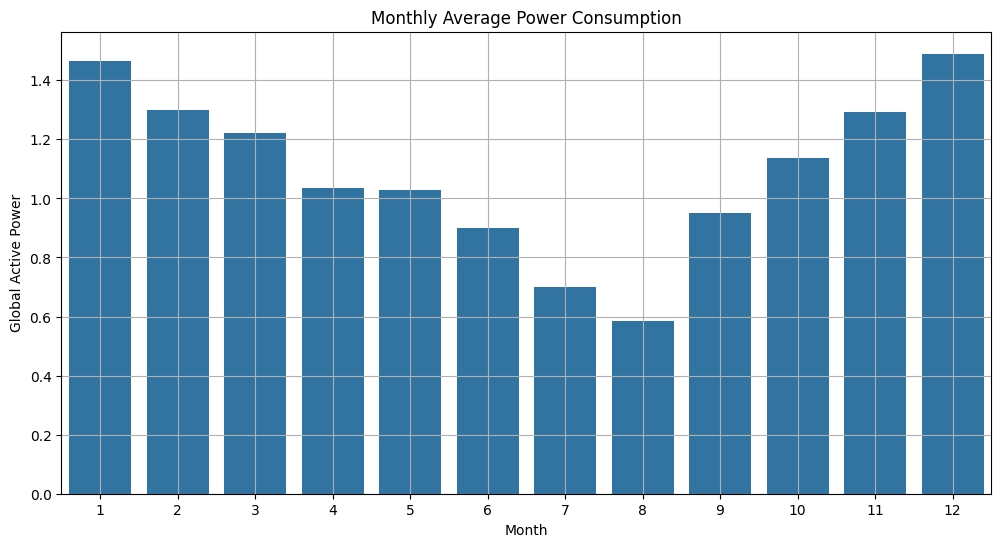

In [60]:
plt.figure(figsize=(12, 6))
sns.barplot(data=dfhhpc, x='month', y='Global_active_power', estimator='mean', errorbar=None)
plt.title("Monthly Average Power Consumption")
plt.xlabel("Month")
plt.ylabel("Global Active Power")
plt.grid()
plt.show()

**Insights:**

Bar plot showing the average power usage per month which helps to find seasonal changes in power consumption.

**Winter Peak (January & December):**

Power consumption is highest in January and December, indicating increased usage, likely due to heating needs.

**Summer Dip (June to August):**

Consumption is lowest in July and August, suggesting reduced electricity usage, possibly due to less heating demand.

Gradual Increase from September to December: After the summer dip, power usage starts increasing steadily from September onward.

### Visualizing Weekday Trends

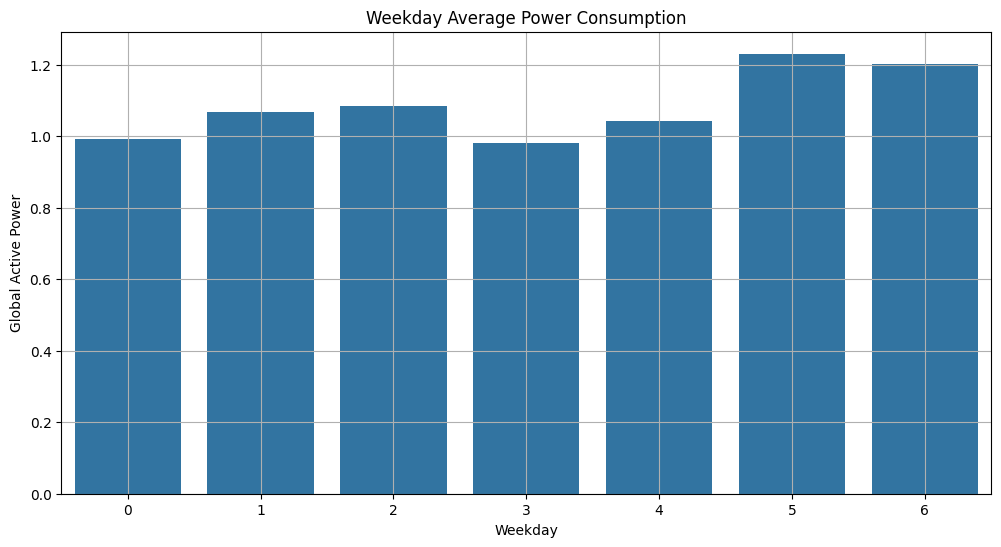

In [62]:
plt.figure(figsize=(12, 6))
sns.barplot(data=dfhhpc, x='weekday', y='Global_active_power', estimator='mean', errorbar=None)
plt.title("Weekday Average Power Consumption")
plt.xlabel("Weekday")
plt.ylabel("Global Active Power")
plt.grid()
plt.show()

**Insights:**

Bar plot showing the average power usage per Weekday which helps to find changes based on weekday power consumption.

**Peak Usage on Weekends/Friday:**

This could suggest increased home appliance use, gatherings, or entertainment activities.

**Lower Usage Early Week:**

Possibly indicates a more consistent routine with less variation in power demand.

### Visualizing Daily Trends

In [ ]:
dfhhpc["datetime"] = pd.to_datetime(dfhhpc[["year", "month", "day", "hour"]], format="%Y-%m-%d %H:%M")
dfhhpc.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,month,day,hour,weekday,daily_avg_power,peak_hour,rolling_avg_power,datetime
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006,12,16,17,5,3.053475,1,4.216000,2006-12-16 17:00:00
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006,12,16,17,5,3.053475,1,4.788000,2006-12-16 17:00:00
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006,12,16,17,5,3.053475,1,4.983333,2006-12-16 17:00:00
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006,12,16,17,5,3.053475,1,5.084500,2006-12-16 17:00:00
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006,12,16,17,5,3.053475,1,4.800800,2006-12-16 17:00:00


In [67]:
daily_trend = dfhhpc.groupby(dfhhpc["datetime"].dt.date)["Global_active_power"].mean()
daily_trend.head()

datetime
2006-12-16    3.053475
2006-12-17    2.354486
2006-12-18    1.530435
2006-12-19    1.157079
2006-12-20    1.545658
Name: Global_active_power, dtype: float64

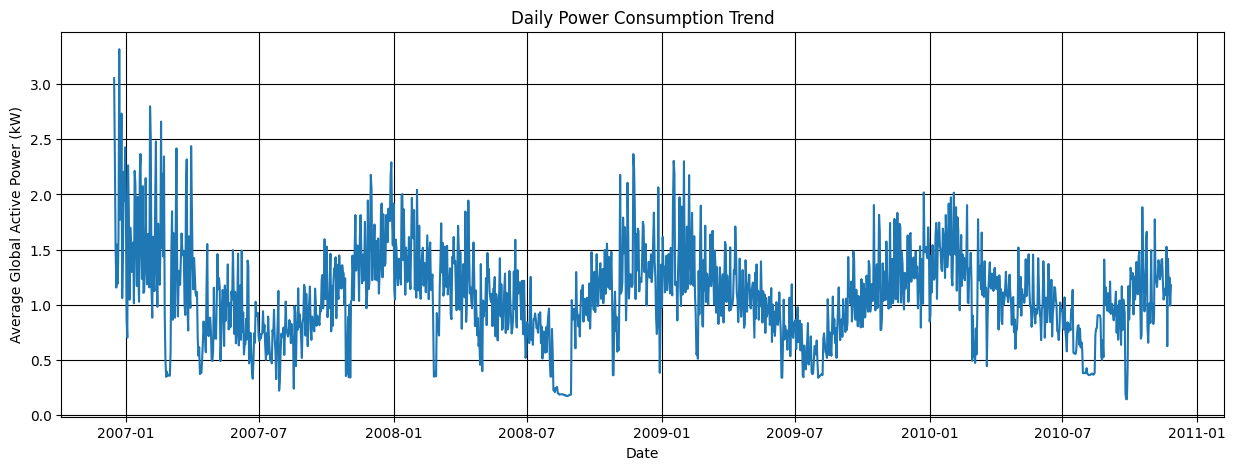

In [68]:
plt.figure(figsize=(15, 5))
daily_trend.plot(kind="line", title="Daily Power Consumption Trend")
plt.xlabel("Date")
plt.ylabel("Average Global Active Power (kW)")
plt.grid(True, color='k')
plt.show()

**Insights:**

Plots a line chart to visualize daily variations in power consumption.

**Overall Declining Trend (2007–2010):**

The power consumption appears to decrease gradually over time, with some fluctuations.

**High Initial Consumption (Early 2007):**

There is a significant peak in power consumption at the beginning of the dataset, with values exceeding 3.0 kW.

**Mid-2008 to Mid-2009 Dip:**

A notable low in power consumption occurs during this period, followed by a gradual increase again.

**Fluctuations in Late 2010:**

Towards the end of the dataset, there are increased variations in power usage, suggesting potential seasonal or behavioral influences.

### Visualizing Hourly Trends

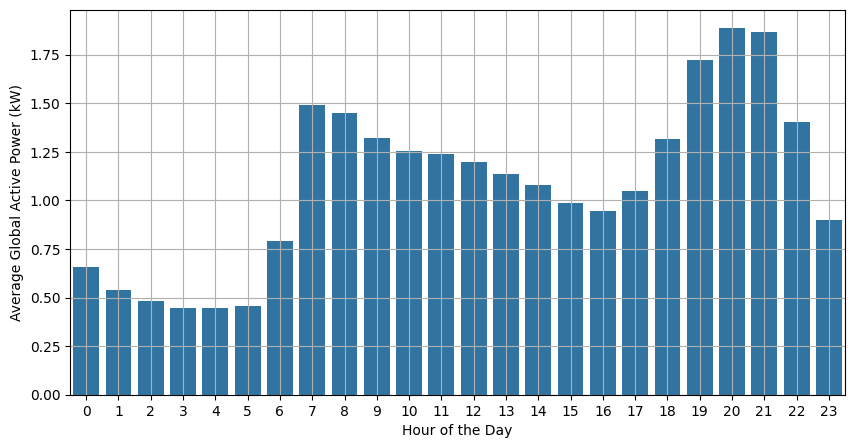

In [69]:
plt.figure(figsize=(10, 5))
sns.barplot(data=dfhhpc, x='hour', y='Global_active_power', estimator='mean', errorbar=None)
plt.xlabel("Hour of the Day")
plt.ylabel("Average Global Active Power (kW)")
plt.grid()
plt.show()

**Insights:**

Creates a bar plot showing power consumption by hour of the day. Helps identify peak energy hours

**Lowest Consumption (Midnight to Early Morning, 0–6 AM):**

Power usage is at its lowest during these hours, likely due to minimal household activity.

**Morning Surge (7–9 AM):**

There is a sharp increase in power consumption, probably due to morning routines like cooking, heating, and appliance usage.

**Daytime Stability (10 AM – 4 PM):**

Power consumption remains relatively stable but slightly decreases during the afternoon.

**Evening Peak (6–9 PM):**

The highest power usage occurs in the evening, with a peak around 8–9 PM, likely due to increased household activity such as cooking, lighting, and entertainment.

**Decline After 9 PM:**

Consumption gradually decreases after the peak, but it remains higher than early morning levels.